# Example Usage

This is a demonstration of using `sphractal` to estimate the fractal dimension of the surface of a 3D object formed from overlapping spheres. 

A gold-platinum (Au-Pt) nanoparticle is used here as a test case.

The directory and file paths in this notebook are set up with the assumption that you are running this notebook from `sphractal/docs/`. If this is not the case, the path needs to be changed accordingly for the cells to be executed properly.

## Compile C++ Code for Point Clouds Surface Representation

First, we need to compile the C++ code written by Ruiz de Miras et al. for the box-counting of point clouds representation of the surface of interest.

In [7]:
!g++ ../src/fbc/3DbinImBCcpu.cpp ../src/fbc/bcCPU.cpp -o ../bin/3DbinImBCcpu.exe

## Set up Relevant Paths and Variables

Next, we need to set up relevant paths and define relevant variables.

In [18]:
xyzFilePath = 'example.xyz'
writeFileDir = '.'
exeDir = '../bin'

verbose=True

## Run Box-Counting Algorithm on an Object

The minimum requirement of input argument to run the box-counting algorithm is simply the path to the xyz file containing the Cartesian coordinates of the object of interest (composed of spherical entities).


example
  Approximating the surface with 300 point clouds for each atom...
    26045 surface points -> 26043 voxels, # grids: 1024
  Representing the surface by treating each atom as exact spheres...
    (1/r)    (# bulk)    (# surf)
      20           0        1041
      24          20        1583
      28          75        2280
      32         184        3052
      38         467        4527
      44         992        6339
      52        2157        9163
      60        4024       12428
      70        7380       17382
      82       13474       24362
  Point clouds  D_Box: 2.2204 [1.9594, 2.4813],  R2: 0.9929
  Exact surface D_Box: 2.2878 [2.2623, 2.3134],  R2: 0.9999


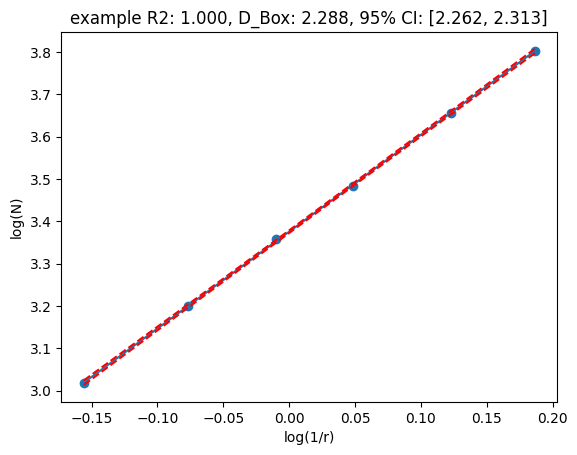

In [26]:
from sphractal.boxCnt import runBoxCnt

boxCntResults = runBoxCnt(xyzFilePath, writeFileDir=writeFileDir, exeDir=exeDir, verbose=verbose)

## Compute Atomic Information

We can have a more detailed look at how the `runBoxCnt()` function was composed.

The xyz or lmp file is first parsed to obtain the atomic information needed for the following steps.

In [21]:
from sphractal.utils import readXYZ, findNN, findSurf

eles, rads, xyzs, maxrange, minxyz, maxxyz = readXYZ(xyzFilePath)
neighs, _ = findNN(rads, xyzs, minxyz, maxxyz, 2.5)
surfs = findSurf(xyzs, neighs, 'alphaShape', 5.0)

## Represent an Object as Point Clouds

The object could be represented as point clouds.

In [23]:
from sphractal.boxCnt import getVoxelBoxCnts

scalesPointCloud, countsPointCloud = getVoxelBoxCnts(eles, rads, surfs, xyzs, neighs, 
                                                     'example', writeFileDir, exeDir, 'cpu', 
                                                     'metal', 300, 1024, 
                                                     True, False, verbose, False)

  Approximating the surface with 300 point clouds for each atom...
    18872 surface points -> 18871 voxels, # grids: 1024


## Represent an Object as Exact Spheres

The object could be represented as exact spheres.

In [22]:
from sphractal.boxCnt import getSphereBoxCnts

scalesExactSurfs, countsExactSurfs = getSphereBoxCnts(eles, rads, surfs, xyzs, neighs, 
                                                      maxrange, (0.2, 1), minxyz, 'example', writeFileDir,
                                                      True, False, verbose, False, 2)

  Representing the surface by treating each atom as exact spheres...
    (1/r)    (# bulk)    (# surf)
      28          62        2088
      34         213        3212
      40         547        4630
      48        1345        6858
      58        3024       10357
      70        6416       15487
      83       12328       22152
     100       24215       32924
     119       44670       47148
     143       83682       68896
